In [22]:
env ROBOFLOW_API_KEY="K1RsKDud3xFEWD4hdbeu"


env: ROBOFLOW_API_KEY="K1RsKDud3xFEWD4hdbeu"


In [ ]:
python.exe -m pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install supervision


[notice] A new release of pip available: 22.3 -> 25.3


[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [1]:
# import a utility function for loading Roboflow models
from inference import get_model

# define the image url to use for inference
image = "https://media.roboflow.com/inference/people-walking.jpg"

# load a pre-trained yolov8n model
model = get_model(model_id="yolov8n-640")

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)

ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM2 model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM2_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM3 model. Install SAM3 dependencies and set CORE_MODEL_SAM3_ENABLED to True.
ModelDependencyMissing: Your `inference` configuration does not support Gaze Detection model. Use pip install 'inference[gaze]' to install missing requirements.To suppress this warning, set CORE_MODEL_GAZE_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support GroundingDINO model. Use pip install 'inference[grounding-dino]' to install missing requirements.To suppress this warning, set CO

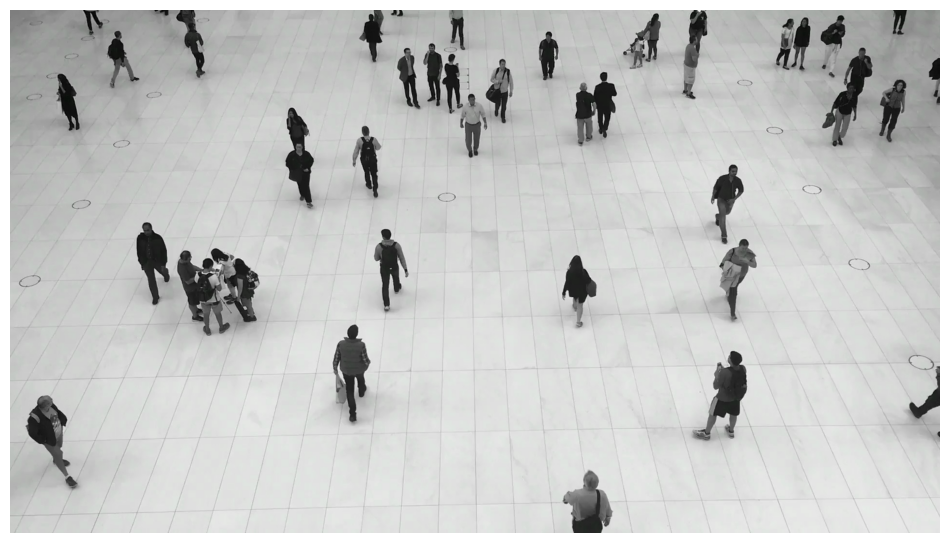

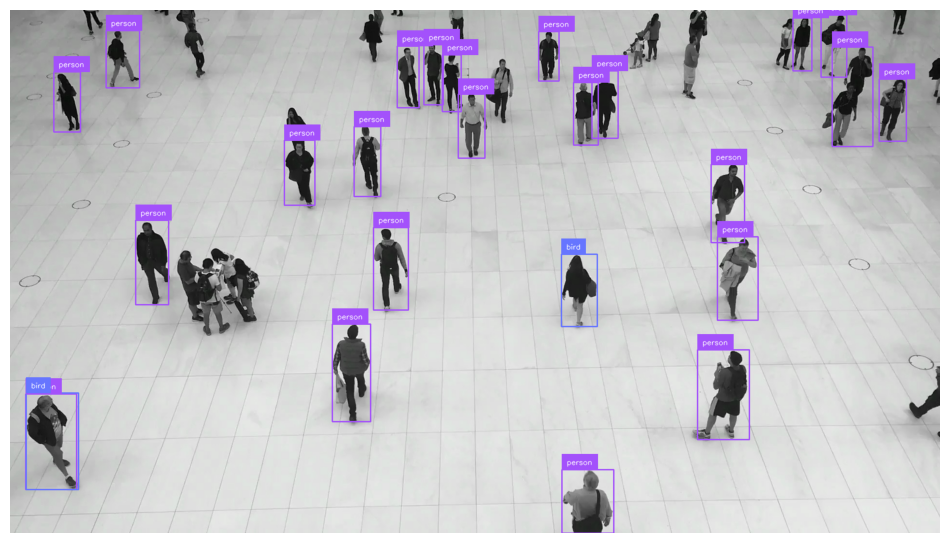

In [2]:
from io import BytesIO

import requests
import supervision as sv
from inference import get_model
from PIL import Image
from PIL.ImageFile import ImageFile


def load_image_from_url(url: str) -> ImageFile:
    response = requests.get(url)
    response.raise_for_status()  # check if the request was successful
    image = Image.open(BytesIO(response.content))
    return image


# load the image from an url
image = load_image_from_url("https://media.roboflow.com/inference/people-walking.jpg")
sv.plot_image(image)

# load a pre-trained yolov8n model
model = get_model(model_id="yolov8n-640")

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)[0]

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# display the image

sv.plot_image(annotated_image)

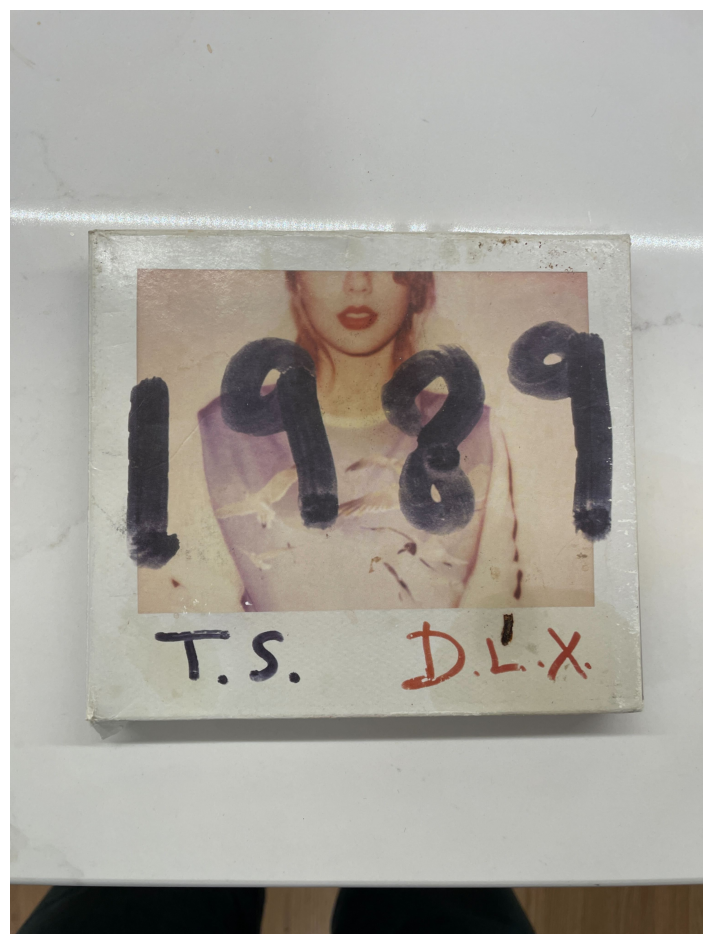

In [8]:
import cv2

bgr = cv2.imread("D:/Desktop/UNI_BOC/Bocconi_3/3_compvis/project/taylor-swift-album-1989.jpeg")
if bgr is None:
    raise FileNotFoundError(f"Image not found: {image_file}")

rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
image = Image.fromarray(rgb)
sv.plot_image(image)


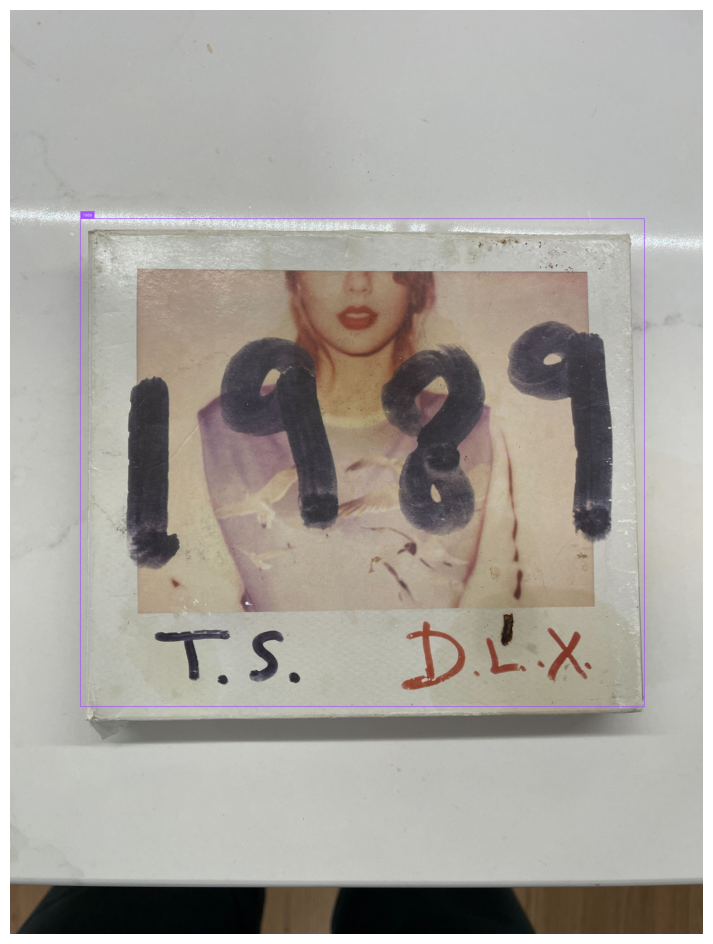

In [9]:
from inference import get_model
import supervision as sv
import cv2

# define the image file to use for inference
image_file = "D:/Desktop/UNI_BOC/Bocconi_3/3_compvis/project/taylor-swift-album-1989.jpeg"

# read with OpenCV (BGR) and convert to RGB PIL Image because this inference configuration
# does not accept NumPy arrays directly
bgr = cv2.imread(image_file)
if bgr is None:
    raise FileNotFoundError(f"Image not found: {image_file}")
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
# PIL.Image was already imported in another cell; use it to create a PIL image
image = __import__("PIL").Image.fromarray(rgb)

# load a pre-trained yolov8n model
model = get_model(model_id="taylor-swift-records/3", api_key="K1RsKDud3xFEWD4hdbeu")

# run inference on our chosen image (pass a PIL image, not a NumPy array)
results = model.infer(image)[0]

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)

In [ ]:
# Import the InferencePipeline object
from inference import InferencePipeline
# Import the built in render_boxes sink for visualizing results
from inference.core.interfaces.stream.sinks import render_boxes

# initialize a pipeline object
pipeline = InferencePipeline.init(
    model_id="rock-paper-scissors-sxsw/14", # Roboflow model to use
    video_reference=0, # Path to video, device id (int, usually 0 for built in webcams), or RTSP stream url
    on_prediction=render_boxes, # Function to run after each prediction
    api_key="K1RsKDud3xFEWD4hdbeu" # Your Roboflow API key
)
pipeline.start()
pipeline.join()

ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM2 model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM2_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM3 model. Install SAM3 dependencies and set CORE_MODEL_SAM3_ENABLED to True.
ModelDependencyMissing: Your `inference` configuration does not support Gaze Detection model. Use pip install 'inference[gaze]' to install missing requirements.To suppress this warning, set CORE_MODEL_GAZE_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support GroundingDINO model. Use pip install 'inference[grounding-dino]' to install missing requirements.To suppress this warning, set CO

KeyboardInterrupt: 

: 